In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
import os
import warnings
warnings.filterwarnings('ignore')

/home/user01/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
path = os.getcwd()

In [3]:
#importing the dataset
dataset = pd.read_csv(f"{path}/phishcoop.csv")
dataset

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,6988,1,-1,1,1,1,-1,1,1,-1,...,1,1,-1,1,1,1,1,0,1,1
6988,6989,-1,-1,1,1,1,-1,0,-1,1,...,1,1,-1,1,1,1,1,0,1,-1
6989,6990,-1,-1,1,1,1,-1,0,1,1,...,1,1,-1,1,1,1,1,0,1,1
6990,6991,-1,-1,1,-1,-1,1,-1,1,1,...,-1,1,-1,1,1,-1,-1,0,1,1


In [4]:
dataset = dataset.drop('id', 1) #removing unwanted column
x = dataset.iloc[ : , :-1].values
y = dataset.iloc[:, -1:].values

#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state =0 )

#fitting logistic regression 
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [5]:
 #Accuracy of train data
classifier.score(x_train,y_train)

0.9321128909229596

In [6]:
 #Accuracy of test data
classifier.score(x_test, y_test)

0.9244851258581236

In [7]:
#predicting the tests set result
y_pred = classifier.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9244851258581236

In [9]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[761  67]
 [ 65 855]]


In [10]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [11]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

<Figure size 432x288 with 0 Axes>

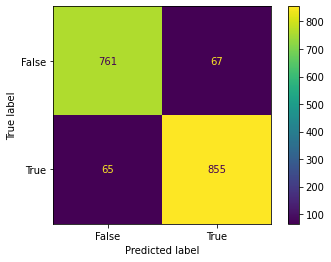

In [12]:
plt.figure(figsize= (6,4))
cm_display.plot()
plt.show()
